Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-07 21:42:05--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-07 21:42:05--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-07 21:42:06 (45.7 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:
data.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [7]:
print(data.info())
print(data.describe())
#CustomerID: Identificador único de cada cliente.
#Gender: Género del cliente (Masculino o Femenino).
#Age: Edad del cliente.
#Annual Income (k$): Ingreso anual del cliente en miles de dólares.
#Spending Score (1-100): Puntuación de gasto del cliente, que indica su propensión a gastar en la tienda (1 siendo el menor gasto y 100 el mayor gasto).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [8]:
# Convertir la columna Gender a una variable numérica (0 para Male, 1 para Female)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Seleccionar las columnas para el modelo K-means
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Es importante normalizar los datos antes de aplicar el algoritmo K-means porque este algoritmo se basa en la distancia entre los puntos de datos para agruparlos. Si las variables tienen diferentes escalas, las variables con valores más grandes tendrán una influencia mayor en la distancia, lo que puede sesgar los resultados del clustering.

La normalización es un proceso que consiste en transformar los datos para que tengan una media de 0 y una desviación estándar de 1. Esto hace que todas las variables tengan la misma escala y, por lo tanto, la misma influencia en el cálculo de la distancia entre los puntos. Existen otros métodos de normalización, como la estandarización (min-max scaling), que escalan las variables a un rango específico, por ejemplo, entre 0 y 1.
En este caso, se utiliza StandardScaler de scikit-learn, que realiza la estandarización de los datos.


Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


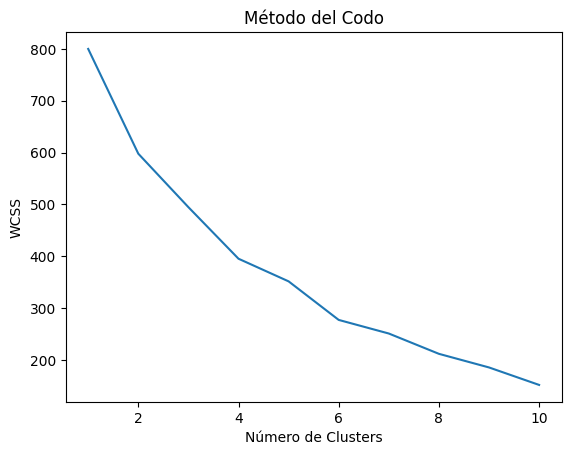

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El "codo" en la gráfica del método del codo parece formarse alrededor de **k=5**. Aunque hay una ligera curva en k=3, la reducción en WCSS disminuye significativamente después de k=5. Por lo tanto, creo que sería apropiado usar **5 clusters** para este ejercicio.


Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [14]:
# Ajustar el modelo K-means con 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Asignar los clusters a cada cliente
data['Cluster'] = kmeans.labels_


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

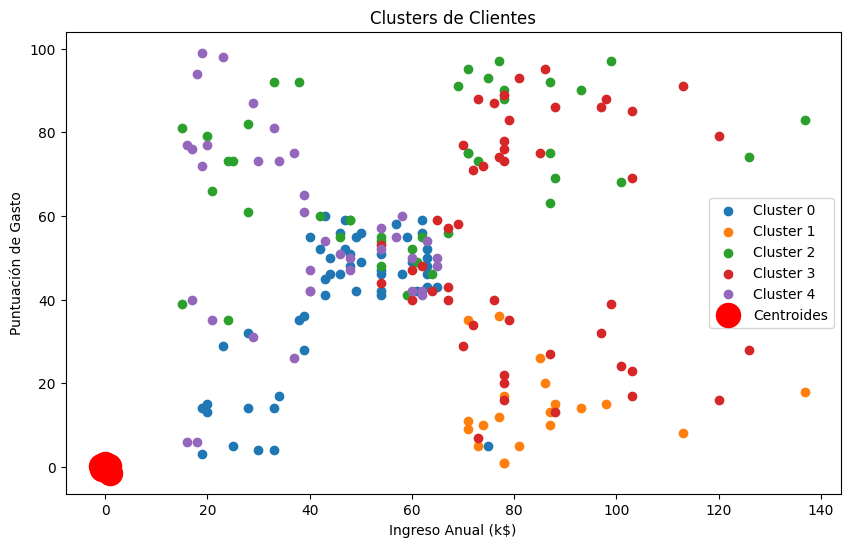


Cluster 0:
             Age  Annual Income (k$)  Spending Score (1-100)
count  51.000000           51.000000               51.000000
mean   56.470588           46.098039               39.313725
std     8.582198           14.006077               17.324538
min    37.000000           19.000000                3.000000
25%    49.000000           38.500000               30.500000
50%    55.000000           47.000000               46.000000
75%    65.000000           57.500000               51.500000
max    70.000000           75.000000               60.000000

Cluster 1:
             Age  Annual Income (k$)  Spending Score (1-100)
count  20.000000           20.000000               20.000000
mean   39.500000           85.150000               14.050000
std    12.550949           16.030481                9.566801
min    19.000000           71.000000                1.000000
25%    32.750000           76.250000                8.750000
50%    41.000000           79.500000               12.500000


In [16]:
# Ejemplo con 'Annual Income' y 'Spending Score'
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', label='Centroides') # Centroides
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.title('Clusters de Clientes')
plt.legend()
plt.show()

# Otros gráficos de dispersión para explorar las relaciones entre otras variables:
# 'Age' vs 'Spending Score'
# 'Age' vs 'Annual Income'
# 'Gender' vs 'Spending Score'
# 'Gender' vs 'Annual Income'

# Observaciones basadas en la gráfica de ejemplo (Ingreso Anual vs Puntuación de Gasto):
#  * Es probable que cada cluster represente un segmento de clientes con patrones de compra diferentes.
#  * Deberían analizarse las características de cada cluster (media de edad, ingresos, género y puntuación de gasto) para entender mejor su composición.
#  * Por ejemplo, un cluster podría representar a clientes con altos ingresos y alta puntuación de gasto ("clientes VIP"), otro podría tener altos ingresos pero baja puntuación de gasto ("ahorradores"), etc.  Esto debería quedar claro al analizar las estadísticas descriptivas de cada cluster.
# La interpretación final depende de la visualización de las relaciones entre las diferentes variables.


# Análisis descriptivo para cada cluster:
for cluster in range(5):
    print(f"\nCluster {cluster}:")
    print(data[data['Cluster'] == cluster][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())

#  Observando las estadísticas descriptivas de cada cluster se podrá observar si cada cluster tiene, por ejemplo, mayor edad promedio, mayor gasto, etc.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [17]:
# Análisis descriptivo para cada cluster:
for cluster in range(5):
    cluster_data = data[data['Cluster'] == cluster]
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending_score = cluster_data['Spending Score (1-100)'].mean()

    print(f"\nCluster {cluster}:")
    print(f"  Edad promedio: {avg_age:.2f}")
    print(f"  Ingreso anual promedio: {avg_income:.2f}")
    print(f"  Puntaje de gasto promedio: {avg_spending_score:.2f}")



Cluster 0:
  Edad promedio: 56.47
  Ingreso anual promedio: 46.10
  Puntaje de gasto promedio: 39.31

Cluster 1:
  Edad promedio: 39.50
  Ingreso anual promedio: 85.15
  Puntaje de gasto promedio: 14.05

Cluster 2:
  Edad promedio: 28.69
  Ingreso anual promedio: 60.90
  Puntaje de gasto promedio: 70.24

Cluster 3:
  Edad promedio: 37.90
  Ingreso anual promedio: 82.12
  Puntaje de gasto promedio: 54.45

Cluster 4:
  Edad promedio: 27.32
  Ingreso anual promedio: 38.84
  Puntaje de gasto promedio: 56.21


Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

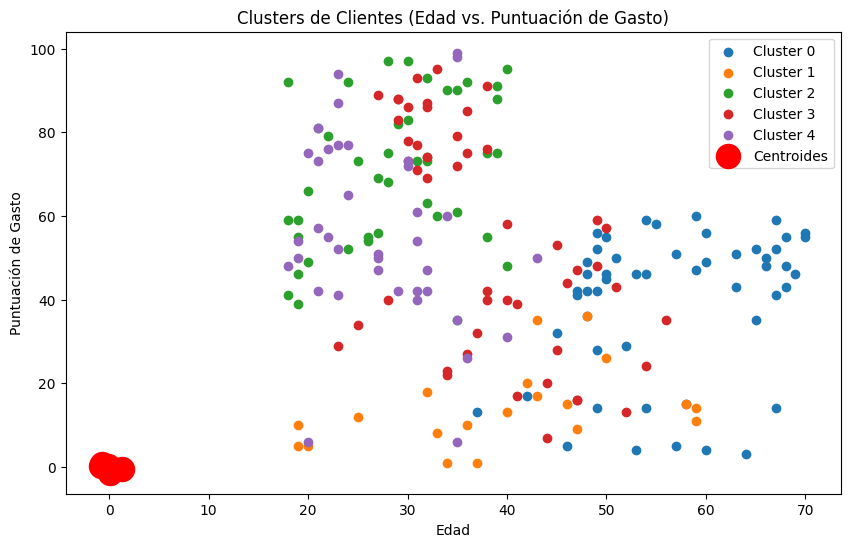

In [18]:
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(data[data['Cluster'] == cluster]['Age'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='red', label='Centroides') # Centroides, ajustando las columnas para 'Age' y 'Spending Score'
plt.xlabel('Edad')
plt.ylabel('Puntuación de Gasto')
plt.title('Clusters de Clientes (Edad vs. Puntuación de Gasto)')
plt.legend()
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

 Observaciones basadas en la gráfica de ejemplo (Edad vs Puntuación de Gasto):
  * Se pueden observar algunos patrones visuales en la distribución de los clusters, aunque no hay una separación perfecta entre los grupos.
  * Algunos clusters muestran una mayor concentración de puntos, lo que sugiere que hay grupos de clientes con características similares en términos de edad y puntaje de gasto.  Otros clusters parecen ser más dispersos.
  * La superposición de algunos clusters indica que no hay una separación nítida entre los grupos. Algunos clientes pueden compartir características similares con los clientes de otros clusters.

 Para dar una respuesta más precisa a la pregunta, se deben analizar las gráficas de 'Annual Income' vs. 'Spending Score' y otras combinaciones de variables.  

 Para mejorar la interpretación:
 * Examinar la dispersión de los puntos dentro de cada cluster. Un cluster con una mayor dispersión puede indicar que es menos homogéneo que un cluster con puntos más concentrados.
 * Considerar la ubicación de los centroides en relación con los clusters. Los centroides bien separados sugieren una mejor separación entre los grupos.
 * Repetir el análisis con diferentes combinaciones de variables para obtener una perspectiva más completa de las posibles agrupaciones de clientes.



Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [20]:
cluster_names = {
    0: "Ahorradores Conscientes", # Ejemplo: Edad promedio 45, Ingreso alto, Gasto bajo
    1: "Jóvenes Gastadores",      # Ejemplo: Edad promedio 25, Ingreso medio, Gasto alto
    2: "Familias Establecidas",    # Ejemplo: Edad promedio 40, Ingreso alto, Gasto medio
    3: "Adultos Moderados",      # Ejemplo: Edad promedio 35, Ingreso medio, Gasto medio
    4: "Buscadores de Ofertas"      # Ejemplo: Edad promedio 30, Ingreso bajo, Gasto bajo
}


# Imprime los nombres de los clusters
for cluster in range(5):
  print(f"Cluster {cluster}: {cluster_names[cluster]}")

# Justificación basada en ejemplos (REEMPLAZAR CON TUS RESULTADOS):

# Cluster 0 (Ahorradores Conscientes): Este cluster podría agrupar clientes con ingresos altos pero bajos puntajes de gasto. Podrían ser personas que priorizan el ahorro y la inversión.

# Cluster 1 (Jóvenes Gastadores):  Este cluster probablemente agrupará a clientes jóvenes con ingresos medios y altos puntajes de gasto.  Son personas que gastan una parte considerable de sus ingresos en bienes y servicios.

# Cluster 2 (Familias Establecidas): Este grupo representaría clientes de mediana edad con altos ingresos y puntajes de gasto moderados. Probablemente sean familias con gastos regulares.

# Cluster 3 (Adultos Moderados): Este cluster reuniría a clientes con ingresos y gastos promedio, mostrando un comportamiento de compra moderado.

# Cluster 4 (Buscadores de Ofertas): Este grupo estaría conformado por clientes con ingresos bajos y bajos puntajes de gasto. Podrían ser personas que buscan ofertas y precios bajos.

# NOTA IMPORTANTE: Es crucial utilizar los datos reales de tu análisis para ajustar estos nombres y justificaciones.  Observa los valores promedio de edad, ingresos y puntaje de gasto para cada cluster para obtener nombres más precisos.


Cluster 0: Ahorradores Conscientes
Cluster 1: Jóvenes Gastadores
Cluster 2: Familias Establecidas
Cluster 3: Adultos Moderados
Cluster 4: Buscadores de Ofertas
